# Data Cleaning 

The WESAD Dataset is huge (12GB). But all of it is not useful. As mentioned in the original paper some part of the signal, that have labels > 3 are not important for stress data or are due to device malfuction. 

In this notebook I have cleaned the dataset to only the relevant that is needed for this project. This reduces the dimensionality of the dataset and also ensures better results.

I have further done certain analysis on the data, which are also shown here

In [1]:
import numpy as np
import pandas as pd 
import pickle 
import gc
import os
import ctypes

# User Input
### Change the below cell and input the number of the Subject you want

There were 17 participants in the test, but unfortunately device malfunctioned for two of them. So to get the neat and useful data of a paticular subject, set the file number accordingly. 
From 
[2,3,4,5,6,7,8,9,10,11,13,14,15,16,17]

In [2]:
file_num:int = 8

Change the path below as well

In [3]:
filename_ = "../input/wesad-stress-detection/PKL Datas/S{}.pkl".format(file_num)

In [4]:
print(file_num)

8


In [5]:
def create_dataframe(filename):
    "It returns a pandas Dataframe consisting of chest data"
    
    # reading the data
    infile = open(filename,'rb')
    new_dict = pickle.load(infile, encoding= 'latin1')
    infile.close()
    
    # 
    data = pd.DataFrame()


    # Acceleration data        
    data['ACCX'] = new_dict['signal']['chest']['ACC'][:,0]
    data['ACCY'] = new_dict['signal']['chest']['ACC'][:,1]
    data['ACCZ'] = new_dict['signal']['chest']['ACC'][:,2]


    # Reading input data
    for i in new_dict['signal']['chest'].keys() :
        if i != 'ACC' :
            data[i] = new_dict['signal']['chest'][i]   

    # labels data
    data['label'] = new_dict['label']
    
    return data  

In [6]:
data = create_dataframe(filename_)

In [8]:
import pandas as pd
import numpy as np


import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc 
from matplotlib.ticker import MaxNLocator

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [10]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ['#01BEFE', '#FFDD00', '#FF7D00', '#FF006D', '#ADFF02', '#8F00FF']

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 16,10

In [11]:
data.head()

,ACCX,ACCY,ACCZ,ECG,EMG,EDA,Temp,Resp,label
0,0.8746,-0.0232,0.2762,0.169510,-0.005356,4.368591,34.264893,-1.718140,0
1,0.8802,-0.0114,0.2638,0.166397,0.009933,4.372025,34.280182,-1.716614,0
2,0.8870,0.0002,0.2382,0.163376,0.014786,4.381943,34.263397,-1.705933,0
3,0.8954,0.0176,0.2030,0.153259,0.015884,4.365921,34.271027,-1.710510,0
4,0.9002,0.0326,0.1486,0.147629,0.028381,4.366684,34.261841,-1.713562,0


In [12]:
data.columns

Index(['ACCX', 'ACCY', 'ACCZ', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp', 'label'], dtype='object')

In [13]:
data.describe()

,ACCX,ACCY,ACCZ,ECG,EMG,EDA,Temp,Resp,label
count,3.826200e+06,3.826200e+06,3.826200e+06,3.826200e+06,3.826200e+06,3.826200e+06,3.826200e+06,3.826200e+06,3.826200e+06
mean,8.247114e-01,-8.770056e-02,-2.707233e-01,1.477229e-03,-2.612202e-03,3.782816e+00,3.365367e+01,6.716237e-02,1.412002e+00
std,8.993059e-02,1.343166e-01,2.936610e-01,2.663206e-01,1.934570e-02,1.922920e-01,1.397702e+00,3.574538e+00,1.635803e+00
min,-4.734000e-01,-7.758000e-01,-1.798400e+00,-1.440353e+00,-1.250198e+00,3.295898e+00,3.363071e+01,-2.435913e+01,0.000000e+00
25%,7.802000e-01,-1.796000e-01,-4.914000e-01,-7.704163e-02,-1.002502e-02,3.669357e+00,3.486157e+01,-1.795959e+00,0.000000e+00
50%,8.426000e-01,-7.059997e-02,-3.070000e-01,-1.789856e-02,-2.059937e-03,3.759384e+00,3.501736e+01,-7.781982e-02,1.000000e+00
75%,8.970000e-01,1.799941e-03,-4.180002e-02,1.762390e-02,5.081177e-03,3.854752e+00,3.520135e+01,1.976013e+00,2.000000e+00
max,2.328600e+00,6.408000e-01,2.261800e+00,1.499954e+00,1.031433e+00,5.717850e+00,3.577652e+01,2.261353e+01,7.000000e+00


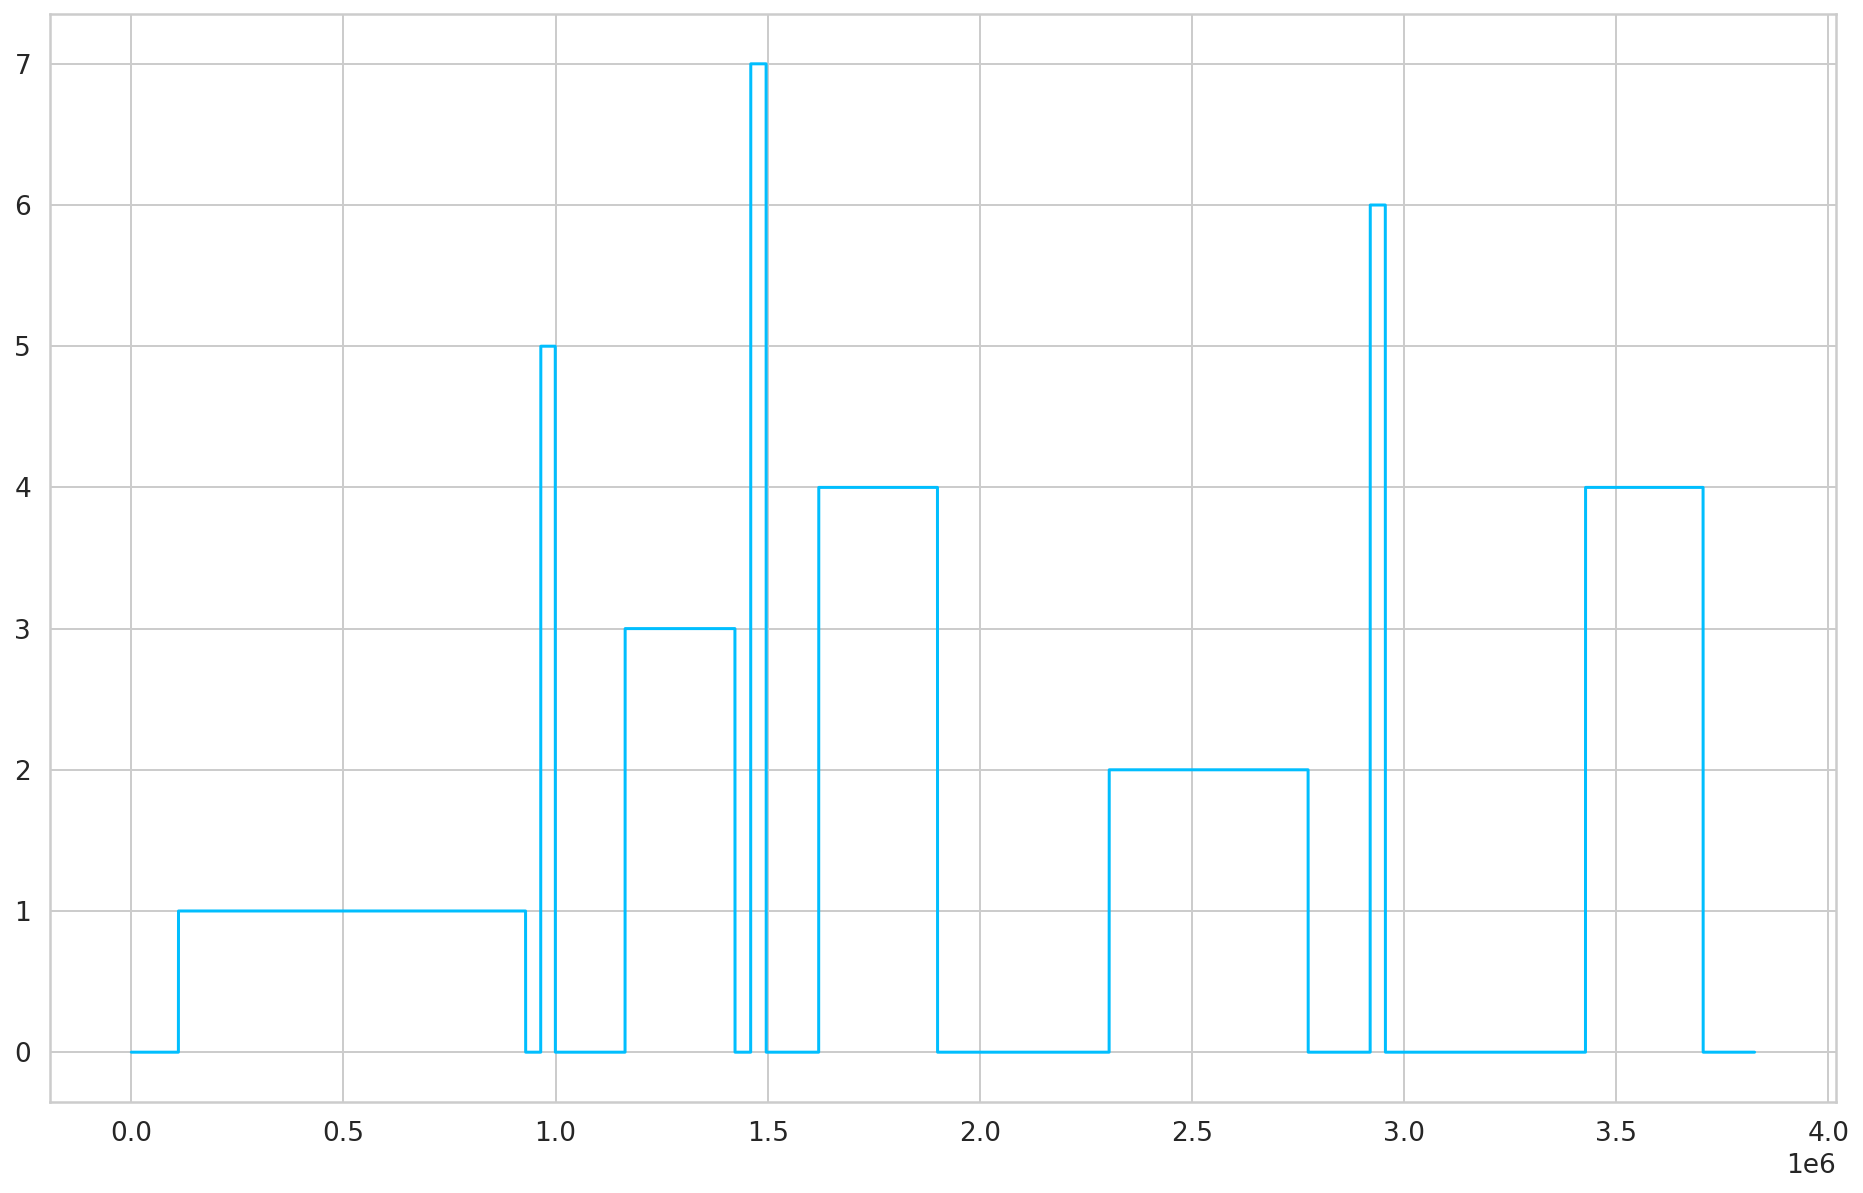

In [14]:
plt.plot(data['label'])
plt.show()

In [15]:
label_1 = data[data['label'] == 1 ]
label_1.describe()

,ACCX,ACCY,ACCZ,ECG,EMG,EDA,Temp,Resp,label
count,818300.000000,818300.000000,818300.000000,818300.000000,818300.000000,818300.000000,818300.000000,818300.000000,818300.0
mean,0.753142,-0.166138,-0.538999,0.001570,-0.002449,3.874559,34.818989,0.072360,1.0
std,0.069864,0.029747,0.115693,0.248329,0.013831,0.094358,0.214129,1.546406,0.0
min,0.528200,-0.611800,-0.885000,-1.101654,-0.402145,3.569412,34.185547,-9.318542,1.0
25%,0.676600,-0.186200,-0.660400,-0.049210,-0.009705,3.803635,34.612518,-0.929260,1.0
50%,0.771000,-0.153800,-0.529400,-0.019455,-0.001968,3.857803,34.835419,-0.025940,1.0
75%,0.811000,-0.144800,-0.453800,0.006409,0.005356,3.898621,34.971069,0.788879,1.0
max,1.050400,-0.038800,0.157000,1.499954,0.251083,4.249573,35.227661,16.091919,1.0


In [16]:
label_2 = data[data['label'] == 2 ]
label_2.describe()

,ACCX,ACCY,ACCZ,ECG,EMG,EDA,Temp,Resp,label
count,469000.000000,469000.000000,469000.000000,469000.000000,469000.000000,469000.000000,469000.000000,469000.000000,469000.0
mean,0.914077,-0.037087,-0.032926,0.001463,-0.002732,3.838104,34.989685,0.068841,2.0
std,0.028364,0.049161,0.057789,0.317534,0.017692,0.094201,0.167880,4.390853,0.0
min,0.600200,-0.331800,-1.798400,-1.440353,-0.210571,3.504944,34.752319,-15.196228,2.0
25%,0.908600,-0.059400,-0.066200,-0.152756,-0.010941,3.773117,35.008118,-2.696228,2.0
50%,0.914600,-0.033400,-0.033400,-0.025589,-0.002289,3.827667,35.106995,-0.392151,2.0
75%,0.921000,-0.010200,-0.005000,0.063309,0.005722,3.901672,35.199768,1.995850,2.0
max,1.494800,0.517600,1.033000,1.499496,0.309860,4.253769,35.432373,20.079041,2.0


In [17]:
label_3 = data[data['label'] == 3 ]
label_3.describe()

,ACCX,ACCY,ACCZ,ECG,EMG,EDA,Temp,Resp,label
count,258999.000000,258999.000000,258999.000000,258999.000000,258999.000000,258999.000000,258999.000000,258999.000000,258999.0
mean,0.790904,0.167375,-0.436829,0.001604,-0.002476,3.734082,34.993938,0.056819,3.0
std,0.017545,0.016746,0.033950,0.248247,0.011646,0.045761,0.059055,3.425036,0.0
min,0.647400,0.071200,-0.573800,-0.597153,-0.302444,3.521347,34.772308,-13.664246,3.0
25%,0.781000,0.162000,-0.457000,-0.059235,-0.008835,3.700256,34.978790,-2.284241,3.0
50%,0.792200,0.169400,-0.432800,-0.012268,-0.001968,3.731537,35.026611,-0.399780,3.0
75%,0.802200,0.175400,-0.411400,0.012314,0.004578,3.773880,35.055969,2.532959,3.0
max,1.029000,0.281000,-0.280200,1.499405,0.202057,3.883743,35.233856,14.320374,3.0


In [18]:
label_3

,ACCX,ACCY,ACCZ,ECG,EMG,EDA,Temp,Resp,label
1163772,0.8094,0.1220,-0.4270,-0.044586,-0.007050,3.804779,34.989563,-0.878906,3
1163773,0.8074,0.1230,-0.4250,-0.040100,0.005905,3.803635,34.971069,-1.231384,3
1163774,0.8090,0.1234,-0.4246,-0.035202,0.005722,3.808594,34.989563,-0.892639,3
1163775,0.8062,0.1214,-0.4222,-0.034195,0.000595,3.810501,34.978790,-0.868225,3
1163776,0.8066,0.1240,-0.4260,-0.032913,0.008102,3.818893,34.980316,-0.856018,3
...,...,...,...,...,...,...,...,...,...
1422766,0.7742,0.1644,-0.4666,-0.016708,0.005539,3.639221,34.992676,-2.494812,3
1422767,0.7748,0.1650,-0.4662,-0.017578,-0.001602,3.638840,35.005005,-2.491760,3
1422768,0.7754,0.1640,-0.4680,-0.018356,-0.002518,3.638840,34.986511,-2.490234,3
1422769,0.7754,0.1658,-0.4676,-0.022522,-0.000916,3.642273,35.011200,-2.479553,3


In [19]:
label_3.columns

Index(['ACCX', 'ACCY', 'ACCZ', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp', 'label'], dtype='object')

In [20]:
sns.set()

In [21]:
label_1.count()[0], label_2.count()[0], label_3.count()[0]

(818300, 469000, 258999)

In [22]:
label_1

,ACCX,ACCY,ACCZ,ECG,EMG,EDA,Temp,Resp,label
110972,0.7112,-0.1910,-0.6150,-0.015884,0.005951,4.188919,34.315338,0.465393,1
110973,0.7112,-0.1934,-0.6150,-0.017349,-0.013412,4.185104,34.240479,0.152588,1
110974,0.7114,-0.1932,-0.6130,-0.014511,-0.014786,4.186630,34.301605,0.471497,1
110975,0.7108,-0.1922,-0.6122,-0.010391,-0.016663,4.201889,34.234375,0.482178,1
110976,0.7082,-0.1922,-0.6078,-0.011169,-0.002151,4.198837,34.300049,0.506592,1
...,...,...,...,...,...,...,...,...,...
929267,0.7336,-0.1338,-0.5960,-0.019821,0.006042,3.791046,34.969513,1.692200,1
929268,0.7338,-0.1352,-0.5938,-0.016342,-0.010208,3.795624,34.938660,1.689148,1
929269,0.7352,-0.1352,-0.5940,-0.018127,0.005722,3.805542,34.878571,1.670837,1
929270,0.7366,-0.1330,-0.5982,-0.020096,0.003113,3.791428,34.974152,1.670837,1


Amout of data available

In [23]:
label_1.count()[0]/700, label_2.count()[0]/700, label_3.count()[0]/700

(1169.0, 670.0, 369.99857142857144)

### Run only for S4,S7 and ignore the warning
As it has ```700x+1``` data in label 1, 3 respectively

In [24]:
# only for S4 ( it has one extra data)
if file_num == 4 :
    n = 1
    label_1.drop(label_1.tail(n).index,inplace=True)

if file_num == 7 :
    n = 1
    label_3.drop(label_3.tail(n).index,inplace=True)
    

In [25]:
label_1.count()[0]/700, label_2.count()[0]/700, label_3.count()[0]/700

(1169.0, 670.0, 369.99857142857144)

----------------------------------------------------------------------------------------------------

### Code To Generate Sequence Data

- Given **Sampling Rate = 700 Hz**. Therefore we have 700 samples per second 
- Now, for 1 sample represent 1/700s <br/>
- Thus *x* samples represent *x/700s* 

-----------------------------

- We have total data of 2121 seconds ie approximately 35 minutes for this participant (for S2) 
- To know the code for particular subject see the cell below 

In [27]:
# We have total data of 
cnt = (label_1.count() + label_2.count() + label_3.count() )[0]/700
cnt

2208.9985714285713

In [28]:
cnt/60

36.81664285714285

## Appending the data frames 

In [29]:
seq_data = label_1

In [30]:
seq_data = seq_data.append(label_2).append(label_3)

In [31]:
seq_data.count()[0]/700

2208.9985714285713

In [32]:
seq_data.head()

,ACCX,ACCY,ACCZ,ECG,EMG,EDA,Temp,Resp,label
110972,0.7112,-0.1910,-0.6150,-0.015884,0.005951,4.188919,34.315338,0.465393,1
110973,0.7112,-0.1934,-0.6150,-0.017349,-0.013412,4.185104,34.240479,0.152588,1
110974,0.7114,-0.1932,-0.6130,-0.014511,-0.014786,4.186630,34.301605,0.471497,1
110975,0.7108,-0.1922,-0.6122,-0.010391,-0.016663,4.201889,34.234375,0.482178,1
110976,0.7082,-0.1922,-0.6078,-0.011169,-0.002151,4.198837,34.300049,0.506592,1


In [33]:
seq_data.describe()

,ACCX,ACCY,ACCZ,ECG,EMG,EDA,Temp,Resp,label
count,1.546299e+06,1.546299e+06,1.546299e+06,1.546299e+06,1.546299e+06,1.546299e+06,1.546299e+06,1.546299e+06,1.546299e+06
mean,8.082794e-01,-7.113406e-02,-3.683915e-01,1.543235e-03,-2.539523e-03,3.839973e+00,3.524007e+01,6.868940e-02,1.638297e+00
std,8.906684e-02,1.261132e-01,2.420951e-01,2.711789e-01,1.479537e-02,1.013215e-01,3.853379e-01,3.012971e+00,7.522409e-01
min,5.282000e-01,-6.118000e-01,-1.798400e+00,-1.440353e+00,-4.021454e-01,3.504944e+00,3.418555e+01,-1.519623e+01,1.000000e+00
25%,7.636000e-01,-1.562000e-01,-5.366000e-01,-8.074951e-02,-9.887695e-03,3.776550e+00,3.481540e+01,-1.429749e+00,1.000000e+00
50%,8.008000e-01,-1.352000e-01,-4.350000e-01,-1.867676e-02,-2.014160e-03,3.823090e+00,3.497723e+01,-1.144409e-01,1.000000e+00
75%,9.048001e-01,-1.260000e-02,-7.720000e-02,1.835632e-02,5.310059e-03,3.885269e+00,3.506680e+01,1.292419e+00,2.000000e+00
max,1.494800e+00,5.176001e-01,1.033000e+00,1.499954e+00,3.098602e-01,4.253769e+00,3.543237e+01,2.007904e+01,3.000000e+00


# High Class Imbalance

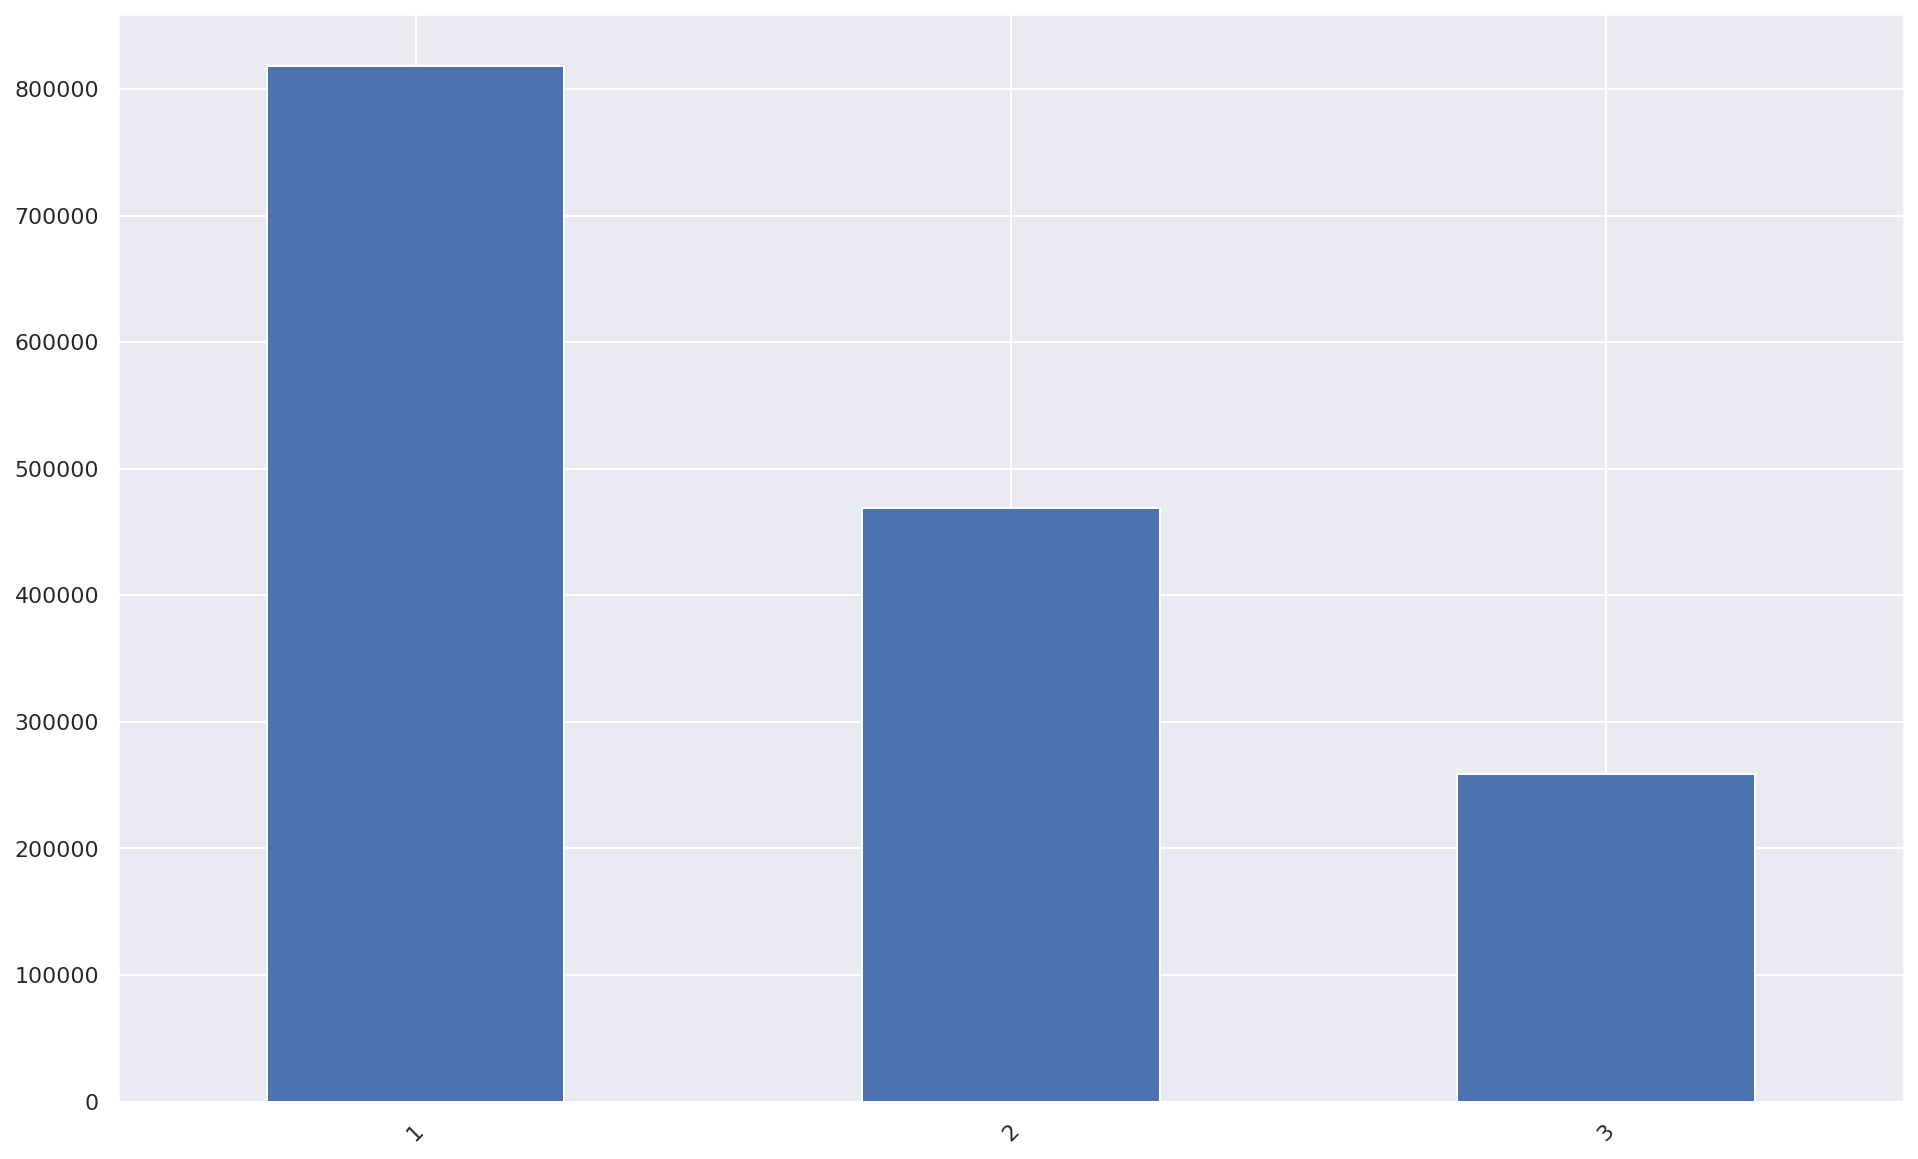

In [34]:
seq_data.label.value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

In [35]:
len(seq_data)/700

2208.9985714285713

In [36]:
seq = np.array([], dtype='int')
for i in range(int(len(seq_data)/700)) :
  temp = np.ones(shape = 700,dtype='int')*i
  seq = np.append(seq,temp)

In [37]:
seq.shape

(1545600,)

In [38]:
seq

array([   0,    0,    0, ..., 2207, 2207, 2207])

## Preprocessing

converting labels to 0,1,2

In [ ]:
seq_data.head()

In [ ]:
seq_data['label'] -= 1

Creating X and Y 

In [ ]:
y_train = pd.DataFrame()
y_train['series_id'] = seq_data['series_id']
y_train['label'] = seq_data['label']

The Lables are already integers so we dont need to encode them

In [ ]:
FEATURE_COLUMNS = seq_data.columns.tolist()[1:]
FEATURE_COLUMNS

In [ ]:
(seq_data.series_id.value_counts() == 700 ).sum() == len(y_train)

In [ ]:
y_train = y_train.groupby(['series_id']).mean()

In [ ]:
temp = range(int(len(seq_data)/700))

In [ ]:
y_train['series_id'] = temp

## ASSERT STATEMENT 
Don't proceed if the following cell outputs False

In [ ]:
(seq_data.series_id.value_counts() == 700 ).sum() == len(y_train)

In [ ]:
seq_data

In [ ]:
name = 'S{}_train.csv'.format(file_num)

In [ ]:
seq_data.to_csv(name)

In [ ]:
y_train

In [ ]:
tname = 'S{}_label.csv'.format(file_num)

In [ ]:
y_train.to_csv(tname)

From the two cells above I have used the cleaned output data

Authored By - Sayan Mondal ( sayan.ee.nitd@gmail.com )